In [2]:
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np

%matplotlib inline

In [3]:
weather_df = pd.read_csv('Weather_Data.csv', index_col=0)
ride_data_first_df = pd.read_csv('Rides_DataA.csv', index_col=0)
ride_data_second_df = pd.read_csv('Rides_DataB.csv', index_col=0)
joined_df = weather_df.join(ride_data_first_df).join(ride_data_second_df)

/Users/alvindeng/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# joined_df[:len(joined_df) / 2].to_csv('merged_ride_weather_data_part_1.csv', index=False)
# joined_df[len(joined_df) / 2:].to_csv('merged_ride_weather_data_part_2.csv', index=False)

In [4]:
def get_time_format(time):
    info = time.split(' ')
    year, month, day = map(int, info[0].split('-'))
    return date(year, month, day)

def get_first_time(row):
    register_date = row['created_date']
    first_date = row['completed_on']
    r_date = get_time_format(register_date)
    f_date = get_time_format(first_date)
    return 1

In [5]:
joined_df['get_first_time'] = joined_df.apply(lambda row: get_first_time(row), axis=1)

In [6]:
fare_df = pd.pivot_table(joined_df,
                        index = ['rider_id'],
                         values = ['total_fare'],
                        aggfunc = [np.sum, len])
fare_df['only_local'] = 0  # test adding a new column to the pivot table    

In [7]:
fare_df.columns = fare_df.columns.droplevel(-1)

In [8]:
fare_df['only_local'] = fare_df['len'].apply(lambda x: 1 if x > 5 else 0)
fare_df.head()

,sum,len,only_local
rider_id,,,
0,35.84,3.0,0
1,8.93,1.0,0
2,6776.20,370.0,1
3,434.63,27.0,1
4,666.86,45.0,1


In [9]:
fare_df[fare_df.only_local == 1]

,sum,len,only_local
rider_id,,,
2,6776.20,370.0,1
3,434.63,27.0,1
4,666.86,45.0,1
5,717.79,74.0,1
6,234.82,16.0,1
7,136.22,12.0,1
8,367.22,39.0,1
9,555.02,25.0,1
10,1406.00,144.0,1


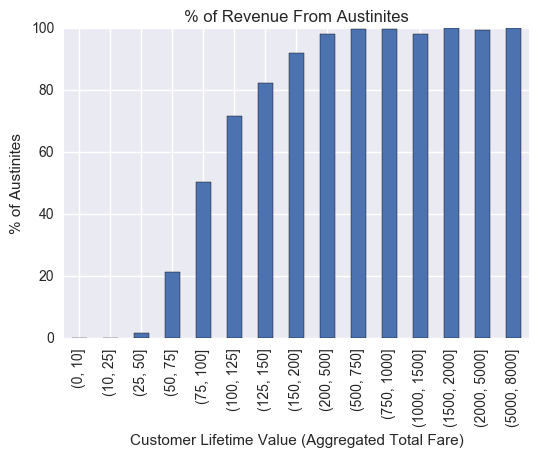

In [10]:
fare_df['fare_range'] = pd.cut(fare_df['sum'], [0, 10, 25, 50, 75, 100, 125, 150, 200, 500, 750, 1000, 1500, 2000, 5000, 8000])
ax = (fare_df[fare_df.only_local == 1].groupby('fare_range').sum() / fare_df.groupby('fare_range').sum() * 100)['sum'].plot(kind='bar')
ax.set_title('% of Revenue From Austinites')
ax.set_xlabel('Customer Lifetime Value (Aggregated Total Fare)')
ax.set_ylabel('% of Austinites')

In [11]:
from matplotlib.pyplot import pie, axis

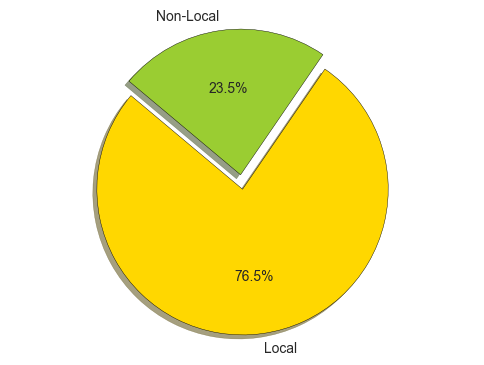

In [12]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1)
pie(fare_df['only_local'].value_counts(), explode=explode, labels=['Local', 'Non-Local'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
axis('equal')
ax.set_title('Local Riders vs Non-Local Riders')